# Week14 Advanced Visualizations with Seaborn

[Seaborn is a visualization package](https://seaborn.pydata.org/) that leverages Matplotlib on the backend, but with a more elegant interface, and more aesthetically pleasing visuals. Seaborn is probably the most popular python plotting package for data scientists, much like ggplot2 is when working in R, and the two packages offer some similarities in their approach to plotting.

This will be a (hopefully quick!) survey of both univariate and multivariate plotting that you can use for visualizations in your Capstone project.

# Part I: Univariate Plots

In [1]:
# If you have not already, install the pydataset package. 
# This package gives us data sets to work with very easily.
# You will also need the seaborn package.

! pip3 install pydataset
! pip3 install seaborn

In [1]:
# The convention for importing Seaborn is "sns". 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pydataset import data

### About the Iris Data

> "The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other."

*Source: [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)*

In [3]:
# The iris data set 
iris = data("iris")

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Question 1

The description above claims that each species of iris has the same number of observations. Build a barplot of the counts of each observation to verify this fact.

*HINT: Look at the documentation for Seaborn's countplot.*

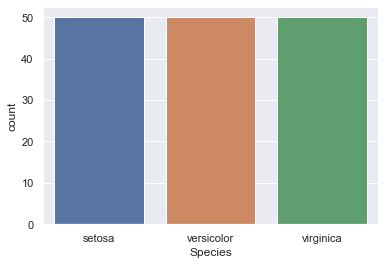

In [4]:
# TODO
sns.set(style="darkgrid")
ax=sns.countplot(x='Species', data=iris)

## Question 2

Do another barplot of the count of observations of species, but this time, only include observations with a petal length of at least 4 cm. 


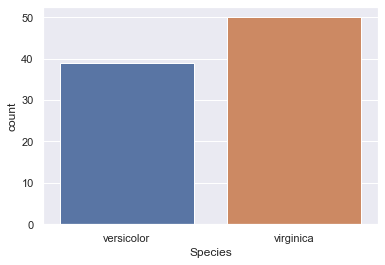

In [5]:
# TODO
iris_len = iris[iris['Petal.Length']>=4]
ax=sns.countplot(x='Species', data=iris_len)

## Question 3

Seeing this plot, which species seems to have the longest petals of the three?

ANSWER: Just based on this plot, it appears to be *virginica*. A boxplot of each species would be even more revealing.

## Univariate Distributions

Next up, lets take a look at various methods for plotting univariate distributions in Seaborn. Try these three methods of plotting the distribution of the Iris petal lengths with Seaborn:

* Boxplot
* Histogram
* [Kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) plot 

## Question 4

Plot the distribution of Iris petal lengths with a boxplot

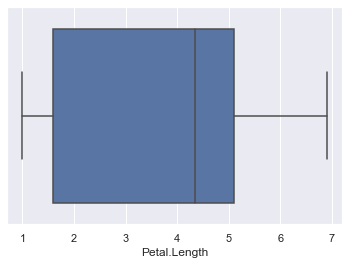

In [6]:
# TODO
ax = sns.boxplot(x=iris['Petal.Length'])

## Question 5

Plot the distribution of Iris petal lengths with a histogram

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


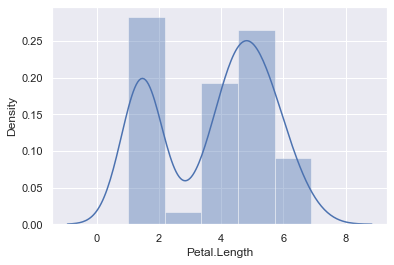

In [7]:
# TODO
ax = sns.distplot(iris['Petal.Length'])

## Question 6

Plot the distribution of Iris petal lengths with a kernel density estimate

<AxesSubplot:xlabel='Petal.Length', ylabel='Density'>

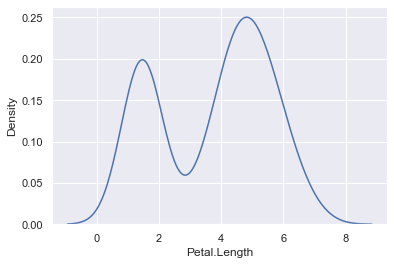

In [8]:
# TODO
sns.kdeplot(iris['Petal.Length'])

# Part II: Multivariate Plots

## About the InsectSprays Dataset

> "The counts of insects in agricultural experimental units treated with different insecticides."

[https://www.rdocumentation.org](https://www.rdocumentation.org/packages/datasets/versions/3.6.1/topics/InsectSprays)

In [7]:
df = data("InsectSprays")
df.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


## Question 1

Use Seaborn to create a vertical boxplot of the count of insects that is grouped by the spray type. 

In [1]:
# TODO
sns.boxplot(x = df['spray'], y = df['count'])
plt.xlabel("Spray Type")
plt.ylabel("Count of Insects")
plt.title("Comparing Count of Insects by Spray Type")
plt.show()

Which types of sprays were more effective?

##### TODO
C looks like the most effective spray, since there are the fewest insects left, followed by D and E.

## Question 2

Generated the same plot, but using a violin plot. Note the similarities and differences between the two. You should see the same distributions, but with a higher level of fidelity.Which types of sprays were more effective?

In [2]:
# TODO
sns.violinplot(x = df['spray'], y = df['count'])
plt.xlabel("Spray Type")
plt.ylabel("Count of Insects")
plt.title("Comparing Count of Insects by Spray Type")
plt.show()

## Question 3

Generate the KDE plot below using Seaborn. Again, note the similarities and differences between the other two plots. You should be able to see the same relationships here, but may choose a different plotting style depending on how you want to tell the story.

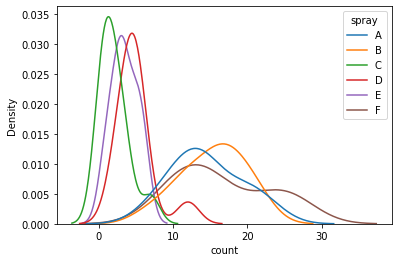

In [3]:
# TODO
sns.set_style('white')
sns.kdeplot(x = df['count'], hue = df['spray'])
plt.show()

## Question 4

Finally, for one last look at the distribution of these counts by spray type, generate a series of histograms using Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) plotting feature. Use the following design requirements:

* Set the col_wrap argument to 3.
* Set the bin width to 2 so you get a consistent bin for every histogram

In [4]:
# TODO
g = sns.FacetGrid(df, col = 'spray', col_wrap = 3)
g.map(sns.histplot,'count', binwidth = 2)
plt.show()

## About the Bfox Dataset

Format

This data frame contains the following columns:

* partic: Percent of adult women in the workforce.
* tfr: Total fertility rate: expected births to a cohort of 1000 women at current age-specific fertility rates.
* menwage: Men's average weekly wages, in constant 1935 dollars and adjusted for current tax rates.
* womwage: Women's average weekly wages.
* debt: Per-capita consumer debt, in constant dollars.
* parttime: Percent of the active workforce working 34 hours per week or less.

Source: [rdocumentation.org](https://www.rdocumentation.org/packages/carData/versions/3.0-2/topics/Bfox)

In [78]:
dfBfox = data("Bfox")
dfBfox.head()

,partic,tfr,menwage,womwage,debt,parttime
1946,25.3,3748,25.35,14.05,18.18,10.28
1947,24.4,3996,26.14,14.61,28.33,9.28
1948,24.2,3725,25.11,14.23,30.55,9.51
1949,24.2,3750,25.45,14.61,35.81,8.87
1950,23.7,3669,26.79,15.26,38.39,8.54


## Question 5

Practice plotting two variables in time by using a Seaborn lineplot to plot men's and women's wages over time.

In [5]:
# TODO
f, ax = plt.subplots(1, 1)
sns.lineplot(x= dfBfox.index, y = dfBfox['menwage'], label = "Men's Wages")
sns.lineplot(x= dfBfox.index, y = dfBfox['womwage'], label = "Women's Wages")
plt.xlabel("Year")
plt.ylabel("Average Weekly Wages")
ax.legend()
plt.show()

Let's say that your capstone project was to predict next year's wages for various employees at some company, let's call it Corporation A. How could you use this visualization to inform your project goal?

##### TODO
Based on this visualization, I'd notice that wages differ by gender and by year, so I'd figure out a way to include both of these features in a model predicting next year's wages.

## About the NOxEmissions Dataset

A typical medium sized environmental data set with hourly measurements of NOx pollution content in the ambient air.

A data frame with 8088 observations on the following 4 variables.

* julday: day number, a factor with levels 373 ... 730, typically with 24 hourly measurements.
* LNOx: log of hourly mean of NOx concentration in ambient air [ppb] next to a highly frequented motorway.
* LNOxEm: log of hourly sum of NOx emission of cars on this motorway in arbitrary units.
* sqrtWS: Square root of wind speed [m/s].

Source: [https://vincentarelbundock.github.io/Rdatasets/doc/robustbase/NOxEmissions.html](https://vincentarelbundock.github.io/Rdatasets/doc/robustbase/NOxEmissions.html)

In [69]:
dfNOX = data("NOxEmissions")
dfNOX.head()

,julday,LNOx,LNOxEm,sqrtWS
193,373,4.457250,5.536489,0.856446
194,373,4.151827,5.513000,1.016612
195,373,3.834061,4.886994,1.095445
196,373,4.172848,5.138912,1.354068
197,373,4.322807,5.666518,1.204159


## Question 6

Use Seaborn to do a scatterplot of LNOx vs. LNoXEm.

In [6]:
# TODO
sns.scatterplot(x = dfNOX['LNOx'], y = dfNOX['LNOxEm'])
plt.show()

What is the relationship between these two variables?

##### TODO
The relationship is mostly linear, based on how the data looks.

Congrats! You've reached the end of the homework assignments for Homegrown. Good luck on your Capstone Project as you finish that up!